<a href="https://colab.research.google.com/github/Rohitdwivedi16111998/Computer-Vision-/blob/master/ResNet_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Library

In [38]:
import tensorflow as tf
from tensorflow import keras
from keras import applications
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

Import the Dataset

In [41]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


There are total 50,000 images in the training and 10,000 are in the tesing. 

Convert the labels into categorical.

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

Import the ResNet as Base Model

We choose include_top = False when we have to customize the fully connected layers. We are using the weights of ImageNet and the input shape is 32X32X3 (Image_Height,Image_width,Channel). Choose channel = 1 when you have grey scale image. Define the total number of classes.

In [ ]:
base_model = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

**MODEL 1: Without Dropout**

Define the Model 1

In [3]:
model_1= Sequential()
model_1.add(base_model) 
model_1.add(Flatten())
model_1.add(Dense(512,activation=('relu'),input_dim=2048))
model_1.add(Dense(256,activation=('relu'))) 
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(128,activation=('relu')))
model_1.add(Dense(10,activation=('softmax')))

Compile the model using optmizer and loss function

In [43]:
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Training Model 1

In [22]:
history = model_1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,batch_size=100)

Epoch 1/15
500/500 [==============================] - 32s 65ms/step - loss: 0.1032 - accuracy: 0.9671 - val_loss: 0.9440 - val_accuracy: 0.7895
Epoch 2/15
500/500 [==============================] - 31s 62ms/step - loss: 0.1144 - accuracy: 0.9656 - val_loss: 1.1021 - val_accuracy: 0.7552
Epoch 3/15
500/500 [==============================] - 31s 61ms/step - loss: 0.0817 - accuracy: 0.9749 - val_loss: 1.1681 - val_accuracy: 0.7738
Epoch 4/15
500/500 [==============================] - 31s 62ms/step - loss: 0.0704 - accuracy: 0.9772 - val_loss: 1.1655 - val_accuracy: 0.7761
Epoch 5/15
500/500 [==============================] - 31s 62ms/step - loss: 0.0669 - accuracy: 0.9789 - val_loss: 1.1337 - val_accuracy: 0.8026
Epoch 6/15
500/500 [==============================] - 31s 62ms/step - loss: 0.0666 - accuracy: 0.9807 - val_loss: 1.0622 - val_accuracy: 0.7743
Epoch 7/15
500/500 [==============================] - 31s 62ms/step - loss: 0.0675 - accuracy: 0.9801 - val_loss: 1.1120 - val_accuracy:

Loss and Accuracy

In [23]:
print("\nTraining Loss and Accuracy: ",model_1.evaluate(x_train,y_train))
print("\nTesting Loss and Accuracy: ",model_1.evaluate(x_test,y_test))

1563/1563 [==============================] - 15s 10ms/step - loss: 0.0327 - accuracy: 0.9893

Training Loss and Accuracy:  [0.032729241997003555, 0.9892600178718567]
313/313 [==============================] - 3s 10ms/step - loss: 0.9752 - accuracy: 0.8079

Testing Loss and Accuracy:  [0.9752122163772583, 0.8079000115394592]


In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Graph for Accuracy and Loss for Model 1

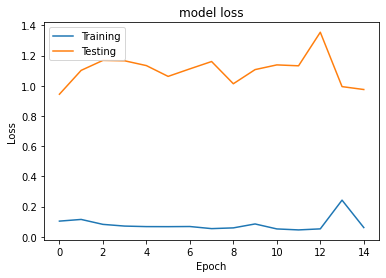

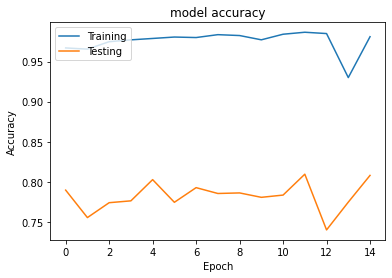

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()

**MODEL 1: With Dropout**

Define the Model 2

In [33]:
model_2= Sequential()
model_2.add(base_model) 
model_2.add(Flatten())
model_2.add(Dense(512,activation=('relu'),input_dim=2048))
model_2.add(Dropout(0.3))
model_2.add(Dense(256,activation=('relu'))) 
model_2.add(Dense(512,activation=('relu'))) 
model_2.add(Dropout(0.3))
model_2.add(Dense(128,activation=('relu')))
model_2.add(Dense(10,activation=('softmax')))

Compile the model 2 using optmizer and loss function.You can also use different optimzer and loss function as well.

In [44]:
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
history = model_2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,batch_size=100)

Epoch 1/15
500/500 [==============================] - 32s 64ms/step - loss: 0.0896 - accuracy: 0.9808 - val_loss: 1.3737 - val_accuracy: 0.7536
Epoch 2/15
500/500 [==============================] - 31s 62ms/step - loss: 0.0699 - accuracy: 0.9868 - val_loss: 2.0239 - val_accuracy: 0.7792
Epoch 3/15
500/500 [==============================] - 31s 61ms/step - loss: 0.4364 - accuracy: 0.9163 - val_loss: 0.8917 - val_accuracy: 0.7874
Epoch 4/15
500/500 [==============================] - 31s 62ms/step - loss: 0.0647 - accuracy: 0.9817 - val_loss: 1.0780 - val_accuracy: 0.8056
Epoch 5/15
500/500 [==============================] - 31s 61ms/step - loss: 0.0218 - accuracy: 0.9944 - val_loss: 1.1513 - val_accuracy: 0.8023
Epoch 6/15
500/500 [==============================] - 31s 61ms/step - loss: 0.0210 - accuracy: 0.9944 - val_loss: 1.2882 - val_accuracy: 0.7858
Epoch 7/15
500/500 [==============================] - 31s 61ms/step - loss: 0.0242 - accuracy: 0.9938 - val_loss: 1.2101 - val_accuracy:

Loss and Accuracy for Model 2

In [36]:
print("\nTraining Loss and Accuracy: ",model_2.evaluate(x_train,y_train))
print("\nTesting Loss and Accuracy: ",model_2.evaluate(x_test,y_test))

1563/1563 [==============================] - 15s 10ms/step - loss: 0.3826 - accuracy: 0.9231

Training Loss and Accuracy:  [0.38256341218948364, 0.9230800271034241]
313/313 [==============================] - 3s 10ms/step - loss: 1.5790 - accuracy: 0.7450

Testing Loss and Accuracy:  [1.5789844989776611, 0.7450000047683716]


Graph of loss and accuracy for Model 2

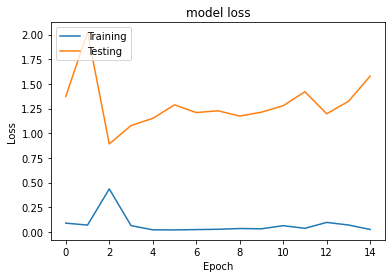

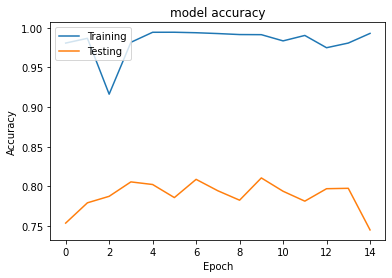

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.show()